# Real Estate Project 

**DESCRIPTION**

- A banking institution requires actionable insights into mortgage-backed securities, geographic business investment, and real estate analysis. 
- The mortgage bank would like to identify potential monthly mortgage expenses for each region based on monthly family income and rental of the real estate.
- A statistical model needs to be created to predict the potential demand in dollars amount of loan for each of the region in the USA. 

### Project Task: Week 1

### A) Data Import and Preparation:

**1.Import data.**

In [2]:
# Import reuired libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import reuired datasets
df_train=pd.read_csv("E:\data base/train.csv")

df_test=pd.read_csv("E:\data base/test.csv")

print("train shape : ", df_train.shape)
print("test shape  : ", df_test.shape) 

train shape :  (27321, 80)
test shape  :  (11709, 80)


In [4]:
#  check top 2 train dataset
df_train.head(2)

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.0877
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.0903


In [5]:
#  check top test dataset
df_test.head(2)

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
1,252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377


In [6]:
# description of the data in the DataFrame
df_train.describe()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
count,27321.000000,0.0,27321.0,27321.000000,27321.000000,27321.000000,27321.000000,27321.000000,27321.000000,2.732100e+04,...,27115.000000,27115.000000,27115.000000,27115.000000,27115.000000,27053.000000,27130.000000,27130.000000,27130.000000,27130.000000
mean,257331.996303,NaN,140.0,85.646426,28.271806,50081.999524,596.507668,37.508813,-91.288394,1.295106e+08,...,40.319803,40.355099,22.178745,544.238432,2208.761903,0.640434,0.508300,0.047537,0.019089,0.100248
std,21343.859725,NaN,0.0,98.333097,16.392846,29558.115660,232.497482,5.588268,16.343816,1.275531e+09,...,5.886317,8.039585,2.540257,283.546896,1089.316999,0.226640,0.136860,0.037640,0.020796,0.049055
min,220342.000000,NaN,140.0,1.000000,1.000000,602.000000,201.000000,17.929085,-165.453872,4.113400e+04,...,16.008330,13.250000,0.556780,0.664700,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,238816.000000,NaN,140.0,29.000000,13.000000,26554.000000,405.000000,33.899064,-97.816067,1.799408e+06,...,36.892050,34.916670,21.312135,355.995825,1471.000000,0.502780,0.425102,0.020810,0.004530,0.065800
50%,257220.000000,NaN,140.0,63.000000,28.000000,47715.000000,614.000000,38.755183,-86.554374,4.866940e+06,...,40.373320,40.583330,22.514410,503.643890,2066.000000,0.690840,0.526665,0.038840,0.013460,0.095205
75%,275818.000000,NaN,140.0,109.000000,42.000000,77093.000000,801.000000,41.380606,-79.782503,3.359820e+07,...,43.567120,45.416670,23.575260,680.275055,2772.000000,0.817460,0.605760,0.065100,0.027488,0.129000
max,294334.000000,NaN,140.0,840.000000,72.000000,99925.000000,989.000000,67.074017,-65.379332,1.039510e+11,...,79.837390,82.250000,30.241270,6197.995200,27250.000000,1.000000,1.000000,0.714290,0.714290,1.000000


In [7]:
# description of the data in the DataFrame
df_test.describe()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
count,11709.000000,0.0,11709.0,11709.000000,11709.000000,11709.000000,11709.000000,11709.000000,11709.000000,1.170900e+04,...,11613.000000,11613.000000,11613.000000,11613.000000,11613.000000,11587.000000,11625.000000,11625.000000,11625.000000,11625.000000
mean,257525.004783,NaN,140.0,85.710650,28.489196,50123.418396,593.598514,37.405491,-91.340229,1.095500e+08,...,40.111999,40.131864,22.148145,550.411243,2233.003186,0.634194,0.505632,0.047960,0.019346,0.099191
std,21466.372658,NaN,0.0,99.304334,16.607262,29775.134038,232.074263,5.625904,16.407818,7.624940e+08,...,5.851192,7.972026,2.554907,280.992521,1072.017063,0.232232,0.139774,0.038693,0.021428,0.048525
min,220336.000000,NaN,140.0,1.000000,1.000000,601.000000,201.000000,17.965835,-166.770979,8.299000e+03,...,15.360240,12.833330,0.737110,0.251910,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,238819.000000,NaN,140.0,29.000000,13.000000,25570.000000,404.000000,33.919813,-97.816561,1.718660e+06,...,36.729210,34.750000,21.270920,363.225840,1499.000000,0.492500,0.422020,0.020890,0.004500,0.064590
50%,257651.000000,NaN,140.0,61.000000,28.000000,47362.000000,612.000000,38.618093,-86.643344,4.835000e+06,...,40.196960,40.333330,22.472990,509.103610,2099.000000,0.687640,0.525270,0.038680,0.013870,0.094350
75%,276300.000000,NaN,140.0,109.000000,42.000000,77406.000000,787.000000,41.232973,-79.697311,3.204540e+07,...,43.496490,45.333330,23.549450,685.883910,2800.000000,0.815235,0.605660,0.065340,0.027910,0.128400
max,294333.000000,NaN,140.0,810.000000,72.000000,99929.000000,989.000000,64.804269,-65.695344,5.520166e+10,...,90.107940,90.166670,29.626680,4145.557870,15466.000000,1.000000,1.000000,0.714290,0.714290,0.362750


In [8]:
# summary of the dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27321 entries, 0 to 27320
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          27321 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     27321 non-null  int64  
 3   COUNTYID                     27321 non-null  int64  
 4   STATEID                      27321 non-null  int64  
 5   state                        27321 non-null  object 
 6   state_ab                     27321 non-null  object 
 7   city                         27321 non-null  object 
 8   place                        27321 non-null  object 
 9   type                         27321 non-null  object 
 10  primary                      27321 non-null  object 
 11  zip_code                     27321 non-null  int64  
 12  area_code                    27321 non-null  int64  
 13  lat             

In [9]:
# summary of the dataframe
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709 entries, 0 to 11708
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          11709 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     11709 non-null  int64  
 3   COUNTYID                     11709 non-null  int64  
 4   STATEID                      11709 non-null  int64  
 5   state                        11709 non-null  object 
 6   state_ab                     11709 non-null  object 
 7   city                         11709 non-null  object 
 8   place                        11709 non-null  object 
 9   type                         11709 non-null  object 
 10  primary                      11709 non-null  object 
 11  zip_code                     11709 non-null  int64  
 12  area_code                    11709 non-null  int64  
 13  lat             

**2.Figure out the primary key and look for the requirement of indexing.**

In [10]:
# unique values/non-repeating values can be used as primary key and duplicates can be removed

print('Duplicates in training dataset :')
print(df_train.duplicated().value_counts(),'\n')

print('Duplicates in testing dataset :')
print(df_test.duplicated().value_counts(),'\n')

Duplicates in training dataset :
False    27161
True       160
Name: count, dtype: int64 

Duplicates in testing dataset :
False    11677
True        32
Name: count, dtype: int64 



In [11]:
# Removing the duplicates from the data set
df_train.drop_duplicates(keep='first', inplace = True)
df_test.drop_duplicates(keep='first', inplace = True)

In [12]:
# Shape
print("train shape : ", df_train.shape)
print("test shape  : ", df_test.shape) 

train shape :  (27161, 80)
test shape  :  (11677, 80)


In [13]:
# check unique values-non-repeating values can be used as primary key 
df_train.nunique()  == df_train.shape[0]

UID             True
BLOCKID        False
SUMLEVEL       False
COUNTYID       False
STATEID        False
               ...  
pct_own        False
married        False
married_snp    False
separated      False
divorced       False
Length: 80, dtype: bool

In [14]:
df_test.nunique() == df_test.shape[0]

UID             True
BLOCKID        False
SUMLEVEL       False
COUNTYID       False
STATEID        False
               ...  
pct_own        False
married        False
married_snp    False
separated      False
divorced       False
Length: 80, dtype: bool

**Insights from above there is unique values in UID variable hence UID column is consider as Primary key in dataset.*

**3.Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable.**

In [15]:
df_train.isnull().sum()

UID                0
BLOCKID        27161
SUMLEVEL           0
COUNTYID           0
STATEID            0
               ...  
pct_own          207
married          150
married_snp      150
separated        150
divorced         150
Length: 80, dtype: int64

In [16]:
df_train.nunique() 

UID            27161
BLOCKID            0
SUMLEVEL           1
COUNTYID         296
STATEID           52
               ...  
pct_own        22302
married        20282
married_snp    10350
separated       6190
divorced       13688
Length: 80, dtype: int64

In [17]:
df_test.nunique() 

UID            11677
BLOCKID            0
SUMLEVEL           1
COUNTYID         246
STATEID           52
               ...  
pct_own        10578
married        10215
married_snp     6829
separated       4512
divorced        8273
Length: 80, dtype: int64

In [18]:
# Block ID column has all missing values, and SUMLEVEL and primary each have single value.
# Hence, will remove these 3 features from both the data sets.

df_test.drop(columns=['BLOCKID', 'SUMLEVEL','primary'], axis = 1, inplace=True)
df_train.drop(columns=['BLOCKID', 'SUMLEVEL','primary'], axis = 1, inplace=True)

df_test.shape[1], df_test.shape[1]

(77, 77)

In [19]:
# missing value treatment

def Check_Null_Col(data):
    Null_Variables=[]
    for i in data.columns:
         if data[i].isna().any()==True:
            Null_Variables.append(i)
    return Null_Variables

In [20]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='mean')

In [21]:
Null_val_train=Check_Null_Col(df_train)
Null_val_test=Check_Null_Col(df_test)

In [22]:
def Mean_Imputer(data, nullset):
    for i in nullset:
        data[i]=imp.fit_transform(data[[i]])

In [23]:
Mean_Imputer(df_train,Null_val_train)
Mean_Imputer(df_test,Null_val_test)

In [24]:
# Shape
print("train shape : ", df_train.shape)
print("test shape  : ", df_test.shape) 

train shape :  (27161, 77)
test shape  :  (11677, 77)


In [25]:
df_train.to_csv('clean_train.csv')
df_test.to_csv('clean_test.csv')

In [26]:
df_train.isna().sum().sum()

0

In [27]:
df_test.isna().sum().sum()

0

### B) Exploratory Data Analysis (EDA):

**4.Perform debt analysis. You may take the following steps:**

**Step1:-**
Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and    percent ownership is above 10 percent. Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to 50 percent.

In [28]:
top_2500_loc = df_train[(df_train['second_mortgage']>0.065) & 
                        (df_train["home_equity"]>.10)].sort_values (by = 'second_mortgage', ascending=False).head(2500)

In [29]:
top_2500_loc=top_2500_loc[['state','city','state_ab','place','lat','lng']]
top_2500_loc.head()

,state,city,state_ab,place,lat,lng
17289,Louisiana,Fort Polk,LA,Fort Polk North,31.099608,-93.202088
7413,Virginia,Alexandria,VA,Bailey's Crossroads,38.828707,-77.121251
1211,Kentucky,Fort Knox,KY,Fort Knox,37.879246,-85.961748
16834,Kentucky,Fort Knox,KY,Fort Knox,37.901474,-85.986474
20807,California,Los Angeles,CA,West Hollywood City,34.067232,-118.292902


In [31]:
import geopandas as gpd
gdf = gpd.GeoDataFrame(top_2500_loc, geometry=gpd.points_from_xy(x=top_2500_loc.lng, y=top_2500_loc.lat))
gdf

,state,city,state_ab,place,lat,lng,geometry
17289,Louisiana,Fort Polk,LA,Fort Polk North,31.099608,-93.202088,POINT (-93.20209 31.09961)
7413,Virginia,Alexandria,VA,Bailey's Crossroads,38.828707,-77.121251,POINT (-77.12125 38.82871)
1211,Kentucky,Fort Knox,KY,Fort Knox,37.879246,-85.961748,POINT (-85.96175 37.87925)
16834,Kentucky,Fort Knox,KY,Fort Knox,37.901474,-85.986474,POINT (-85.98647 37.90147)
20807,California,Los Angeles,CA,West Hollywood City,34.067232,-118.292902,POINT (-118.2929 34.06723)
...,...,...,...,...,...,...,...
19068,Kansas,Augusta,KS,Augusta City,37.613920,-96.926250,POINT (-96.92625 37.61392)
27001,Michigan,Davisburg,MI,Village Of Clarkston City,42.728586,-83.539028,POINT (-83.53903 42.72859)
13509,Colorado,Thornton,CO,Northglenn City,39.948761,-104.974382,POINT (-104.97438 39.94876)
8157,Washington,Bremerton,WA,Navy Yard City,47.564968,-122.657581,POINT (-122.65758 47.56497)


**Step2:-**
Use the following bad debt equation:
- Bad Debt = P (Second Mortgage ∩ Home Equity Loan)
- Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage

In [32]:
import numpy as np
bad_debt_train= (df_train['second_mortgage']+ df_train['home_equity'])-df_train['home_equity_second_mortgage']
bad_debt_test= (df_test['second_mortgage']+ df_test['home_equity'])-df_test['home_equity_second_mortgage']

In [33]:
df_train['bad_debt']=bad_debt_train
df_test['bad_debt']=bad_debt_test

In [34]:
df_train['good_debt']=df_train['debt']-df_train['bad_debt']
df_test['good_debt']=df_test['debt']-df_test['bad_debt']

**Step3:- Create pie charts  to show overall debt and bad debt**

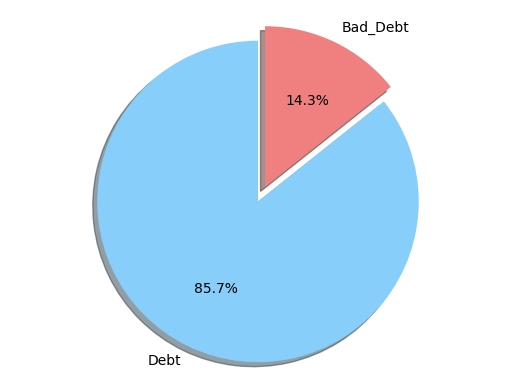

In [35]:
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

labels = 'Debt', 'Bad_Debt'
sizes = [df_train['debt'].mean()*100, df_train['bad_debt'].mean()*100]
colors = [ 'lightskyblue','lightcoral']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes,explode=explode,labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

**Step4:-**Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities

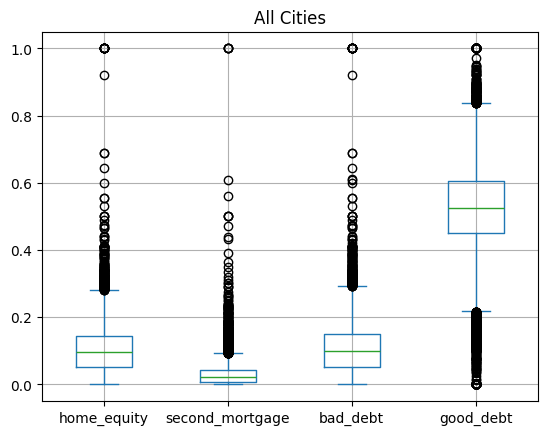

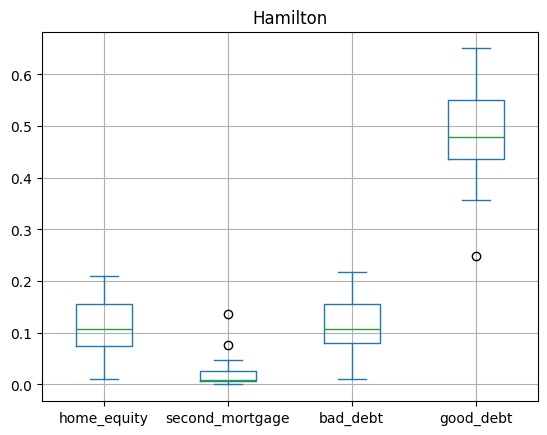

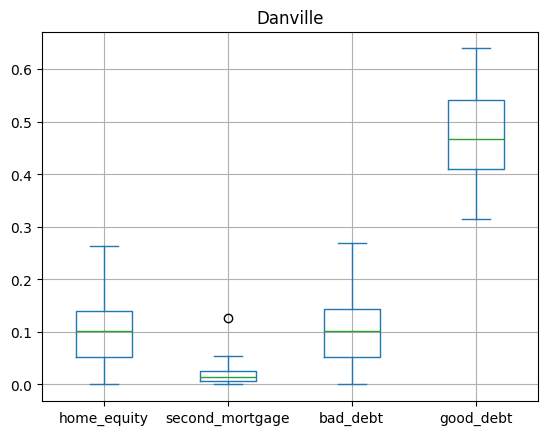

In [36]:
import matplotlib.pyplot as plt

all_cities=df_train[['home_equity','second_mortgage','bad_debt', 'good_debt']]
all_cities.plot.box(grid=True)
plt.title('All Cities')
plt.show()

hamilton=df_train[df_train['city']=='Hamilton']
hamilton=hamilton[['home_equity','second_mortgage','bad_debt', 'good_debt']]
hamilton.plot.box(grid=True)
plt.title('Hamilton')
plt.show()

danville=df_train[df_train['city']=='Danville']
danville=danville[['home_equity','second_mortgage','bad_debt', 'good_debt']]
danville.plot.box(grid=True)
plt.title('Danville')
plt.show()

**Step5:-**Create a collated income distribution chart for family income, house hold income, and remaining income

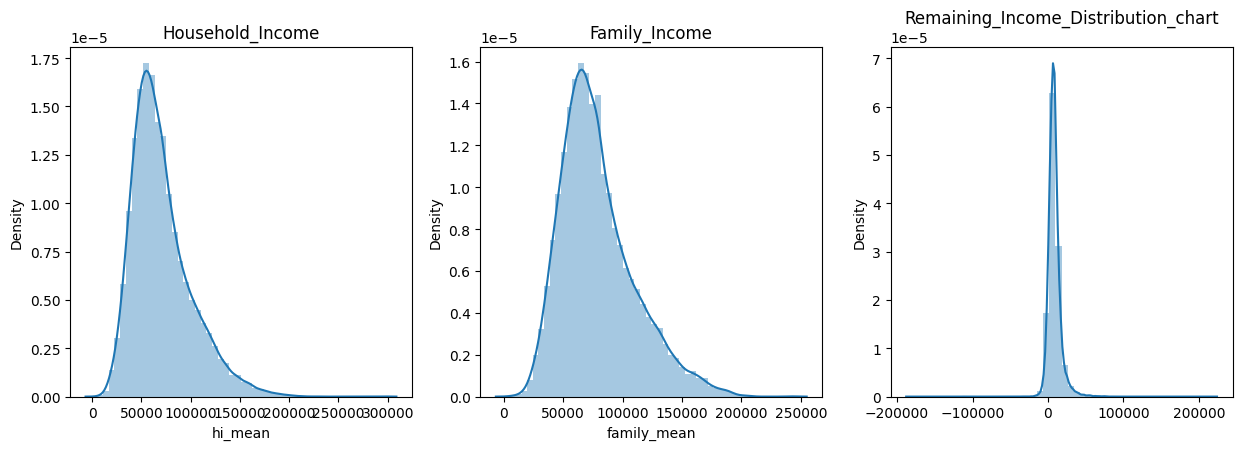

In [37]:
import seaborn as sns

import seaborn as sns
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.distplot(df_train['hi_mean'])
plt.title('Household_Income')

plt.subplot(2,3,2)
sns.distplot(df_train['family_mean'])
plt.title('Family_Income')

plt.subplot(2,3,3)
sns.distplot(df_train['family_mean']-df_train['hi_mean'])
plt.title('Remaining_Income_Distribution_chart')
plt.show()

**5.Perform EDA and come out with insights into population density and age. You may have to derive new fields (make sure to weight averages for accurate measurements):**

**a.** Use pop and ALand variables to create a new field called population density

In [38]:
Pop_Density_train = df_train['pop'] / df_train['ALand']
Pop_Density_test  = df_test['pop']  /  df_test['ALand']
df_train['pop_density'] = Pop_Density_train
df_test['pop_density'] = Pop_Density_test

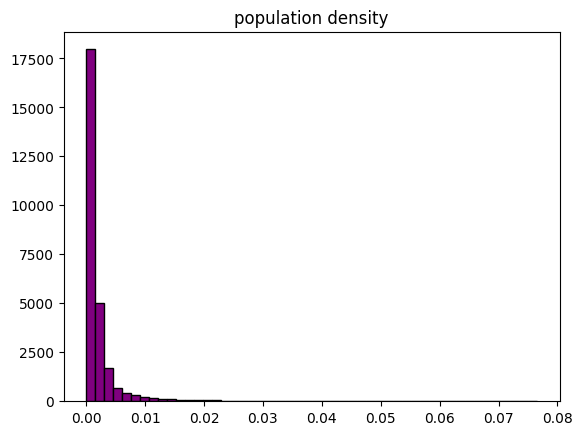

In [39]:
plt.hist(df_train['pop_density'], bins=50, color='purple', edgecolor='black')
plt.title('population density')
plt.show()

**b.** Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age

In [40]:
df_train["age_median"] = (df_train["male_age_median"]) + df_train["female_age_median"] / 2 
df_test["age_median"]  = (df_test["male_age_median"])  + df_test ["female_age_median"] / 2

In [41]:
df_train[["male_age_median", "female_age_median", "male_pop", "female_pop", "age_median" ]].head()

,male_age_median,female_age_median,male_pop,female_pop,age_median
0,44.00000,45.33333,2612,2618,66.666665
1,32.00000,37.58333,1349,1284,50.791665
2,40.83333,42.83333,3643,3238,62.249995
3,48.91667,50.58333,1141,1559,74.208335
4,22.41667,21.58333,2586,3051,33.208335


**c.** Visualize the findings using appropriate chart type

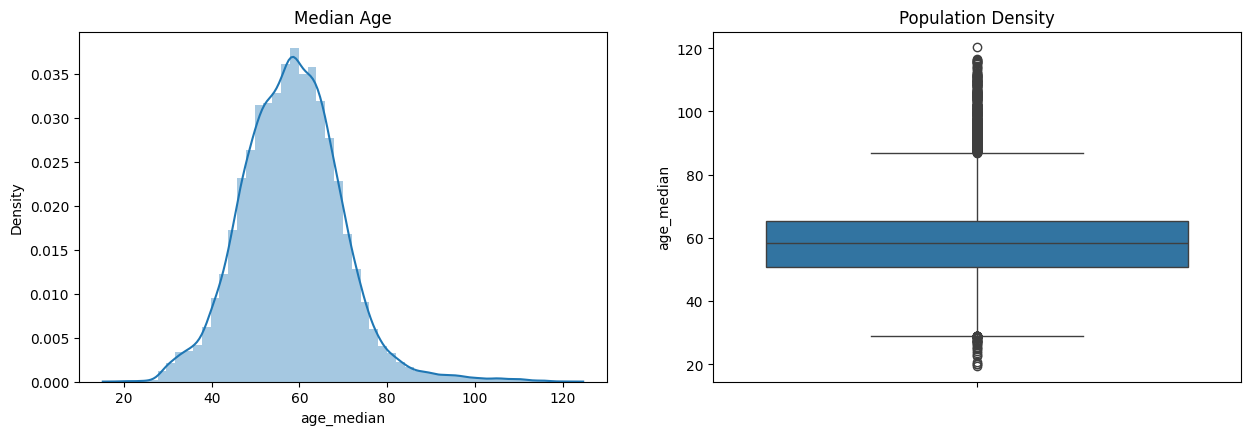

In [42]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(df_train['age_median'])
plt.title('Median Age')
plt.subplot(2,2,2)
sns.boxplot(df_train['age_median'])
plt.title('Population Density')
plt.show() 

**6.Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.**

In [43]:
df_train['pop_bins'] = pd.cut(df_train['pop'], bins=5, labels=['very low','low','medium','high','very high'])
df_train['pop_bins'].value_counts()

pop_bins
very low     26901
low            246
medium           9
high             4
very high        1
Name: count, dtype: int64

**a)** Analyze the married, separated, and divorced population for these population brackets

In [44]:
df_train.groupby(by='pop_bins')[['married','separated','divorced']].count()

,married,separated,divorced
pop_bins,,,
very low,26901,26901,26901
low,246,246,246
medium,9,9,9
high,4,4,4
very high,1,1,1


In [45]:
df_train.groupby(by='pop_bins')[['married','separated','divorced']].agg(["mean", "median"])

married           separated            divorced          
               mean    median      mean    median      mean    median
pop_bins                                                             
very low   0.508546  0.525390  0.019109  0.013640  0.100634  0.096080
low        0.584894  0.593135  0.015833  0.011195  0.075348  0.070045
medium     0.655737  0.618710  0.005003  0.004120  0.065927  0.064890
high       0.629132  0.675095  0.012372  0.007340  0.060562  0.059870
very high  0.734740  0.734740  0.004050  0.004050  0.030360  0.030360

**b)** Visualize using appropriate chart type

<Figure size 1000x500 with 0 Axes>

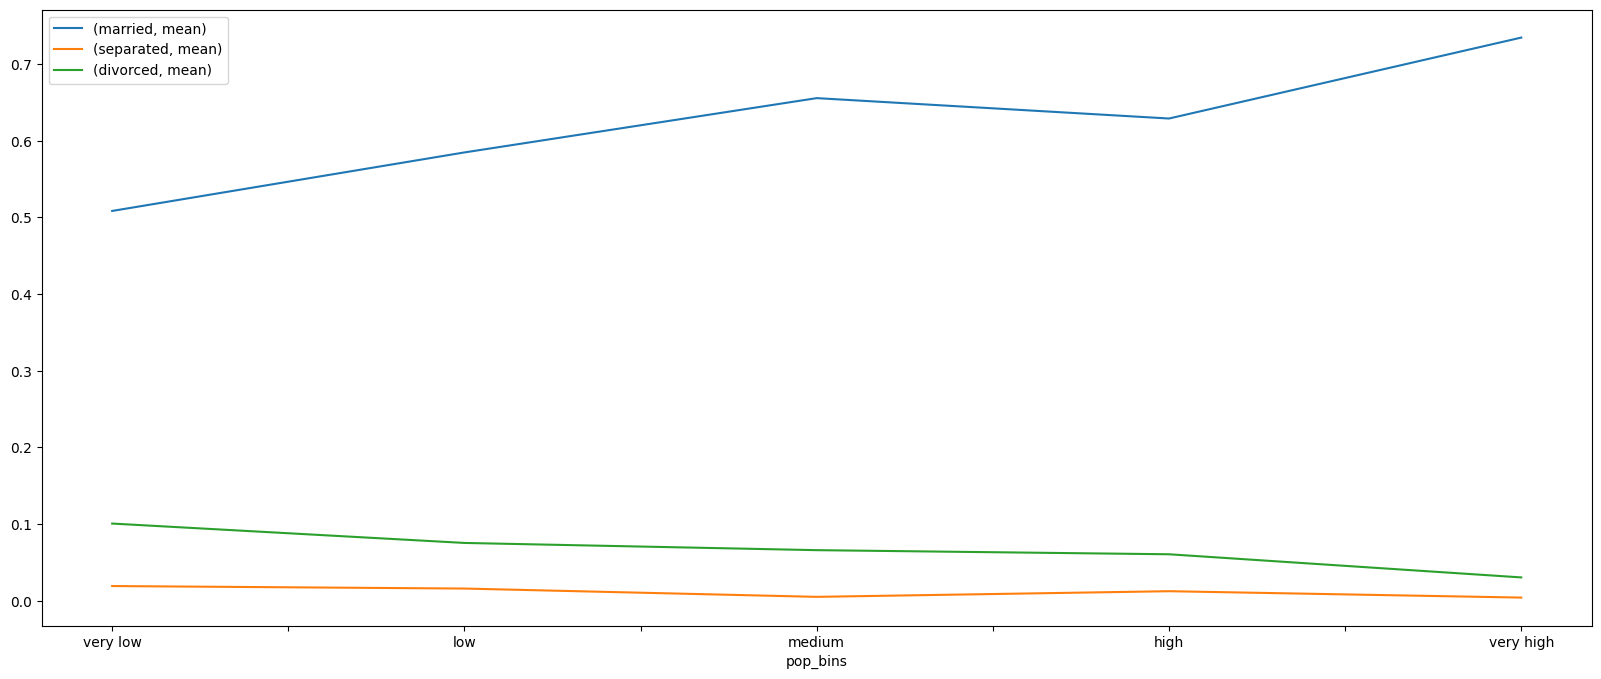

In [46]:
plt.figure(figsize=(10,5))
pop_bin_married=df_train.groupby(by='pop_bins')[['married','separated','divorced']].agg(["mean"])
pop_bin_married.plot(figsize=(20,8))
plt.legend(loc='best')
plt.show()

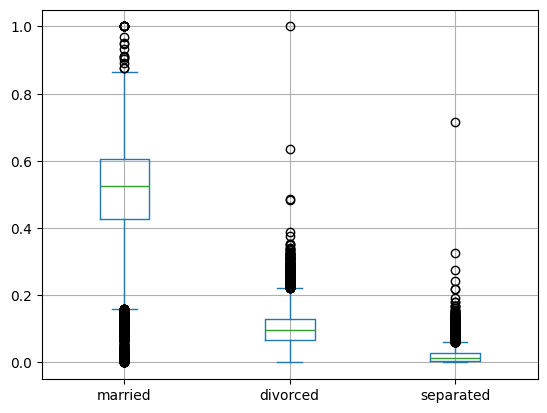

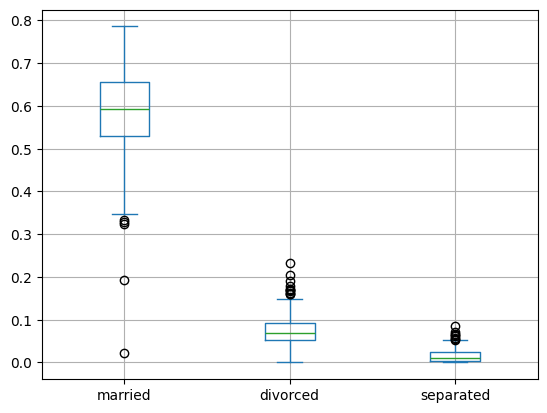

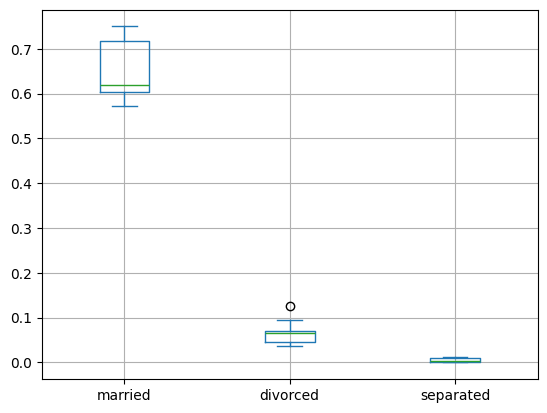

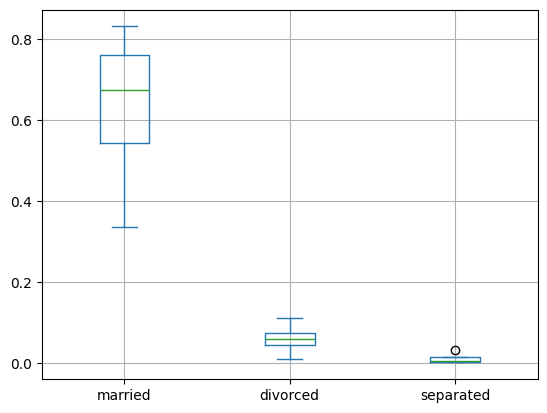

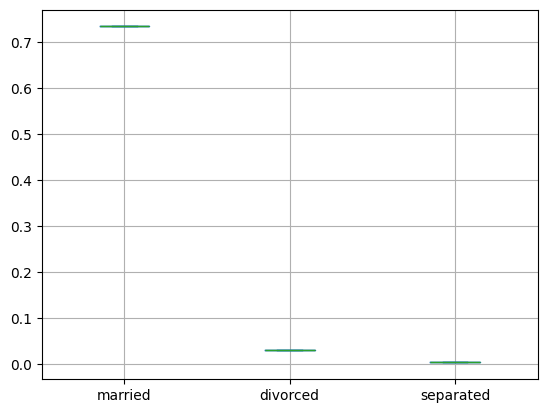

In [47]:
df_train.groupby(by='pop_bins')[['married','divorced', 'separated']].plot.box(grid='True')
plt.show()

**7.Please detail your observations for rent as a percentage of income at an overall level, and for different states.**

In [48]:
rent_state_mean=df_train.groupby(by='state')['rent_mean'].agg(["mean"])
rent_state_mean.head()

,mean
state,
Alabama,774.006498
Alaska,1185.763570
Arizona,1098.689988
Arkansas,718.425272
California,1473.493903


In [49]:
income_state_mean=df_train.groupby(by='state')['family_mean'].agg(["mean"])
income_state_mean.head()

,mean
state,
Alabama,67030.487478
Alaska,92136.545109
Arizona,73390.637993
Arkansas,64409.153057
California,87831.121491


In [51]:
rent_perc_of_income=rent_state_mean['mean']/income_state_mean['mean']
rent_perc_of_income.head(10)

state
Alabama                 0.011547
Alaska                  0.012870
Arizona                 0.014970
Arkansas                0.011154
California              0.016776
Colorado                0.013554
Connecticut             0.012612
Delaware                0.012929
District of Columbia    0.013196
Florida                 0.015789
Name: mean, dtype: float64

In [52]:
sum(df_train['rent_mean'])/sum(df_train['family_mean'])


0.013351076774050012

**8.Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings.**

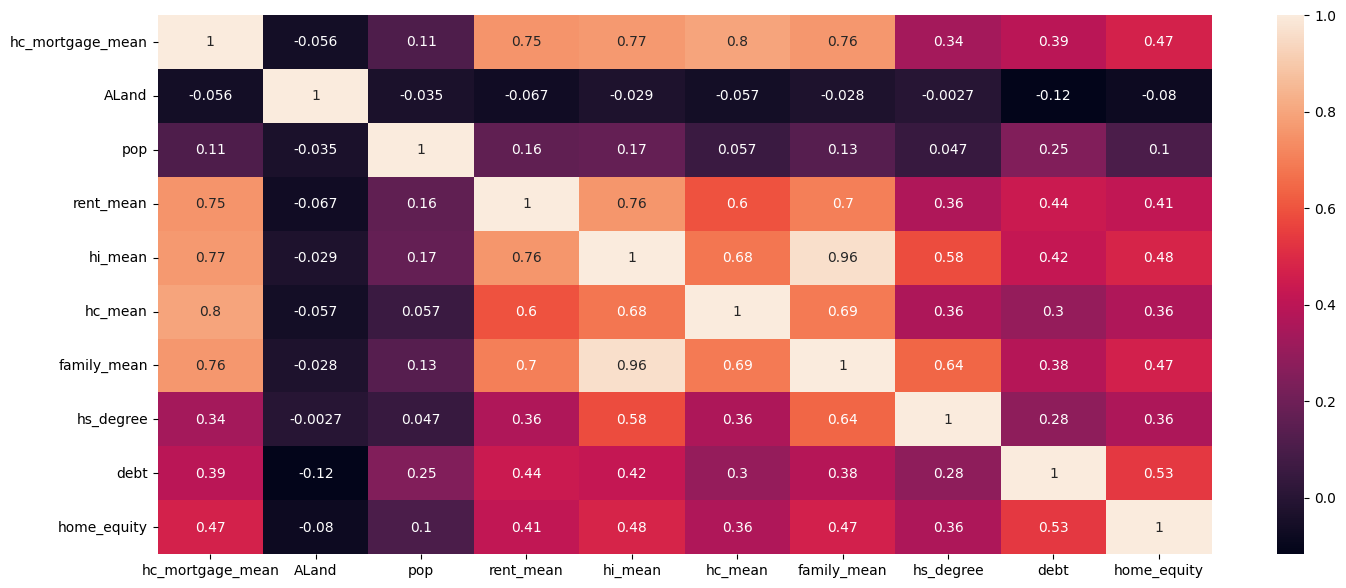

In [53]:
plt.figure(figsize=(17,7))
sns.heatmap(data=df_train[['hc_mortgage_mean','ALand','pop','rent_mean','hi_mean','hc_mean','family_mean',
                           'hs_degree','debt','home_equity']].corr(),annot=True)
plt.show()

### Project Task: Week 2

### C) Data Pre-processing:

**1.The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables.**

**2.Each variable is assumed to be dependent upon a linear combination of the common factors, and the coefficients are known as loadings. Each measured variable also includes a component due to independent random variability, known as “specific variance” because it is specific to one variable. Obtain the common factors and then plot the loadings. Use factor analysis to find latent variables in our dataset and gain insight into the linear relationships in the data**

**Following are the list of latent variables:**
- Highschool graduation rates
- Median population age
- Second mortgage statistics
- Percent own
- Bad debt expense

In [ ]:
pip install factor_analyzer

In [54]:
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer

In [55]:
df_train.isna().sum().sum()

0

In [56]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
UID,27161.0,257328.592209,21342.667653,220342.00000,238826.000000,257212.000000,275810.000000,294334.000000
COUNTYID,27161.0,85.660322,98.373195,1.00000,29.000000,63.000000,109.000000,840.000000
STATEID,27161.0,28.267185,16.385918,1.00000,13.000000,28.000000,42.000000,72.000000
zip_code,27161.0,50105.133243,29546.218041,602.00000,26847.000000,47804.000000,77093.000000,99925.000000
area_code,27161.0,596.589816,232.424069,201.00000,405.000000,614.000000,801.000000,989.000000
...,...,...,...,...,...,...,...,...
divorced,27161.0,0.100385,0.048673,0.00000,0.066210,0.095660,0.128830,1.000000
bad_debt,27161.0,0.105161,0.070420,0.00000,0.052840,0.100190,0.148650,1.000000
good_debt,27161.0,0.524461,0.129606,0.00000,0.449290,0.525880,0.604360,1.000000
pop_density,27161.0,0.002044,0.004509,0.00000,0.000121,0.000851,0.002056,0.076536


### D) Data Modeling :

**3.Build a linear Regression model to predict the total monthly expenditure for home mortgages loan.Please refer deplotment_RE.xlsx. Column hc_mortgage_mean is predicted variable. This is the mean monthly mortgage and owner costs of specified geographical location.  Note: Exclude loans from prediction model which have NaN (Not a Number) values for hc_mortgage_mean.**

**a)** Run a model at a Nation level. If the accuracy levels and R square are not satisfactory proceed to below step.

**b) Run another model at State level. There are 52 states in USA.**

**c) Keep below considerations while building a linear regression model:**
- Variables should have significant impact on predicting Monthly mortgage and owner costs
- Variables should have significant impact on predicting Monthly mortgage and owner costs
- R square of 60 percent and above should be achieved
- Ensure Multi-collinearity does not exist in dependent variables
- Test if predicted variable is normally distributed

In [57]:
df_train.columns

Index(['UID', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place',
       'type', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater', 'pop',
       'male_pop', 'female_pop', 'rent_mean', 'rent_median', 'rent_stdev',
       'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15',
       'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40',
       'rent_gt_50', 'universe_samples', 'used_samples', 'hi_mean',
       'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 'hs_

In [58]:
df_train['type'].unique()

array(['City', 'Urban', 'Town', 'CDP', 'Village', 'Borough'], dtype=object)

In [59]:
type_dict={'type':{'City':1, 'Urban':2, 'Town':3, 'CDP':4, 'Village':5, 'Borough':6}}
df_train.replace(type_dict,inplace=True)

In [60]:
df_test.replace(type_dict,inplace=True)

In [61]:
df_train['type'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [62]:
feature_cols=['COUNTYID','STATEID','zip_code','type','pop', 'family_mean','second_mortgage', 'home_equity', 'debt','hs_degree',
              'age_median','pct_own', 'married','separated', 'divorced']

In [63]:
xtrain=df_train[feature_cols]
ytrain=df_train['hc_mortgage_mean']

In [64]:
xtest=df_test[feature_cols]
ytest=df_test['hc_mortgage_mean']

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,accuracy_score

In [66]:
xtest.head()

,COUNTYID,STATEID,zip_code,type,pop,family_mean,second_mortgage,home_equity,debt,hs_degree,age_median,pct_own,married,separated,divorced
0,163,26,48239,4,3417,53802.87122,0.06443,0.07651,0.63624,0.91047,44.708330,0.70252,0.28217,0.03813,0.14299
1,1,23,4210,1,3796,85642.22095,0.01175,0.14375,0.64755,0.94290,69.416665,0.85128,0.64221,0.00000,0.13377
2,15,42,14871,6,3944,65694.06582,0.01316,0.06497,0.45395,0.89238,64.166670,0.81897,0.59961,0.01358,0.10026
3,231,21,42633,1,2508,44156.38709,0.00995,0.01741,0.41915,0.60908,67.000000,0.84609,0.56953,0.04694,0.12489
4,355,48,78410,3,6230,123527.02420,0.00000,0.03440,0.63188,0.86297,65.083335,0.79077,0.57620,0.00588,0.16379


In [67]:
sc=StandardScaler()
xtrain_scaled=sc.fit_transform(xtrain)
xtest_scaled=sc.fit_transform(xtest)

**Run a model at a Nation level. If the accuracy levels and R square are not satisfactory proceed to below step**

In [68]:
lr=LinearRegression()
lr.fit(xtrain_scaled,ytrain)

LinearRegression()

In [69]:
ypred= lr.predict(xtest_scaled)

**R square of 60 percent and above should be achieved**

In [70]:
print("Overall R2 score of linear regression model", r2_score(ytest,ypred))
print("Overall RMSE of linear regression model", np.sqrt(mean_squared_error(ytest,ypred)))

Overall R2 score of linear regression model 0.7393650505184304
Overall RMSE of linear regression model 320.46411191708256


**Run another model at State level. There are 52 states in USA.**

In [71]:
state=df_train['STATEID'].unique()
state

array([36, 18, 72, 20,  1, 48, 45,  6,  5, 24, 17, 19, 47, 32, 22,  8, 44,
       28, 34, 41,  4, 12, 55, 42, 37, 51, 26, 39, 40, 13, 16, 46, 27, 29,
       53, 56,  9, 54, 21, 25, 11, 15, 30,  2, 33, 49, 50, 31, 38, 35, 23,
       10], dtype=int64)

In [72]:
for i in [11,33,35]:
    print("State ID-",i)

    xtrain_nation=df_train[df_train['COUNTYID']==i][feature_cols]
    ytrain_nation=df_train[df_train['COUNTYID']==i]['hc_mortgage_mean']
    
    xtest_nation=df_test[df_test['COUNTYID']==i][feature_cols]
    ytest_nation=df_test[df_test['COUNTYID']==i]['hc_mortgage_mean']
    
    xtrain_scaled_nation=sc.fit_transform(xtrain_nation)
    xtest_scaled_nation=sc.fit_transform(xtest_nation)
    
    lr.fit(xtrain_scaled_nation,ytrain_nation)
    ypred_nation=lr.predict(xtest_scaled_nation)
    
    print("Overall R2 score of linear regression model for state,",i,":-" ,r2_score(ytest_nation,ypred_nation))
    print("Overall RMSE of linear regression model for state,",i,":-" ,np.sqrt(mean_squared_error(ytest_nation,ypred_nation)))
    print("\n")

State ID- 11
Overall R2 score of linear regression model for state, 11 :- 0.7466965040298004
Overall RMSE of linear regression model for state, 11 :- 238.00669942760936


State ID- 33
Overall R2 score of linear regression model for state, 33 :- 0.8615110128116417
Overall RMSE of linear regression model for state, 33 :- 211.17226657126838


State ID- 35
Overall R2 score of linear regression model for state, 35 :- 0.7190561128961511
Overall RMSE of linear regression model for state, 35 :- 258.27254147313795




**Test if predicted variable is normally distributed**

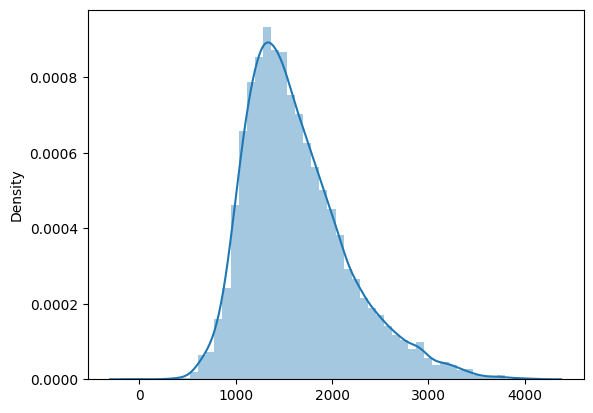

In [73]:
sns.distplot(ypred)
plt.show()

### D) Data Reporting :

**4.Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:**

- Box plot of distribution of average rent by type of place (village, urban, town, etc.).
- Pie charts to show overall debt and bad debt.
- Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map.
- Heat map for correlation matrix.
- Pie chart to show the population distribution across different types of places (village, urban, town etc.).

# Dashboard Link
https://public.tableau.com/app/profile/sonal.ranpise/viz/Capstone-RealEstateProject/RealEstateDashboard?publish=yes